# TDA & Deep Learning Project Report

Floran DEFOSSEZ
Gatien Chopard
Sebastien ROIG

Ce notebook a pour objectif de synthétiser et illustrer les concepts et résultats de l'article de Bertand Michel and Frédéric Chazal "An Introduction to Topological Data Analysis: Fundamental and Practical Aspects for Data Scientists". Nous allons uliliser pour cela la librairie GUDHI.

# Simplicial Complexes

TODO : définition

Afin de d'analyser le structure topologique d'un nuage de point, il est possible de se servir d'un complexe simplicial construit à partir de ces données. Il existe de nombreuses méthodes de construction, nous allons vous présenter les deux principales : Le compexe de Vietoris–Rips et le compexe de Čech

#### The Vietoris-Rips

Ci-dessous sont représenté les complexes de Rips à partir d'un ensemble de 100 points échantillonées sur une couronne du plan euclidien pour 2 valeurs de alpha.

In [5]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline


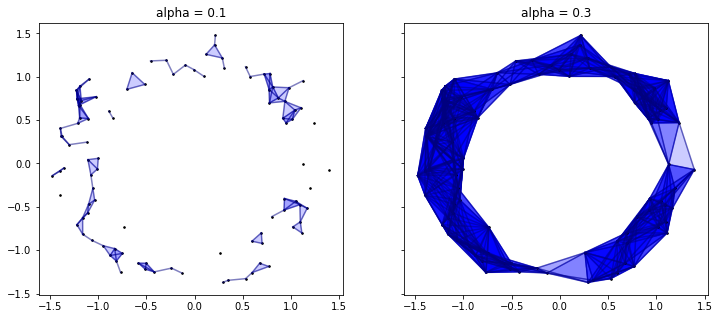

In [70]:

points = utils.anulus(100)

alpha = [0.1,0.3]
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

for i in range(2):
    rips_complex = gd.RipsComplex(points=points)
    simplex_tree = rips_complex.create_simplex_tree(2)
    triangles = np.array([x[0] for x in simplex_tree.get_skeleton(2) if len(x[0]) == 3 and x[1] <= 2*alpha[i]])
    lines = np.array([x[0] for x in simplex_tree.get_skeleton(2) if len(x[0]) == 2 and x[1] <= 2*alpha[i]])

    ax[i].set_title(f"alpha = {alpha[i]}")
    for triangle in triangles:
        ax[i].fill(points[triangle][:,0], points[triangle][:,1], color='b', alpha=0.2)
    for line in lines:
        ax[i].plot(points[line][:,0], points[line][:,1], c='navy', alpha=0.5)
    ax[i].scatter(points[:,0],points[:,1],s=2.5,c='black')
plt.show()



On remarque que pour une valeur d'alpha trop faible, la filtration est trop restrictive et les simplexes ne parviennent pas à se rejoindre pour reformer un anneau. Par ailleurs, si on avait choisi une valeur alpha très grande, toutes les simplexes constructibles aurait été accepté et on aurait obtenu un disque.

Choisir la bonne valeur de filtration aplha est donc primordiale pour construire un complexes dont les propriétés topologiques ressemble à l'object échantillonné.

#### Complexe Alpha

Représentons de la même manière les complexes Alpha issue du même nuage de point.

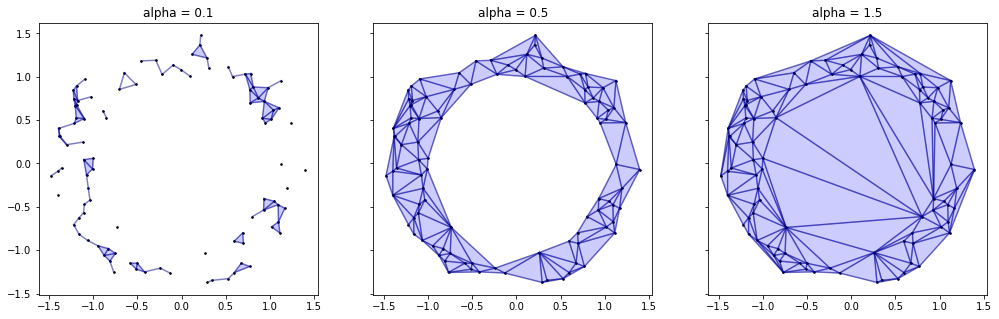

In [89]:
alpha = [0.1,0.5,1.5]

cech_complexe = gd.AlphaComplex(points=points)
simplex_tree = cech_complexe.create_simplex_tree()

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17, 5))
for i in range(3):
    triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha[i]**2])
    lines = np.array([x[0] for x in simplex_tree.get_skeleton(2) if len(x[0]) == 2 and x[1] <= alpha[i]**2])
    ax[i].set_title(f"alpha = {alpha[i]}")
    for triangle in triangles:
        ax[i].fill(points[triangle][:,0], points[triangle][:,1], color='b', alpha=0.2, )
    for line in lines:
        ax[i].plot(points[line][:,0], points[line][:,1], c='navy', alpha=0.5)
    ax[i].scatter(points[:,0],points[:,1],s=2.5,c='black')
plt.show()

Globalement, nous obtenons effectivement le même comportement qu'avec la méthode de Rips. Cependant, nous constatons qu'elle est bien plus rapide à être calculé, nous proposons donc la construction d'un complexe sur un nuage de point en 3 dimension échantillonées sur la surface d'un tore.

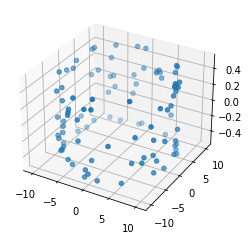

In [12]:
points = torus(100,10,0.5)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
l = ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# The Mapper Algorithm

# Geometric Reconstruction and Homology Inference

# Persistent Homology

# Statistical Aspects of Persistent Homology